# Alzheimer Disease Classification Experiment 2

In [1]:
#Import all the dependencies
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
# import the metrics class
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

In [3]:
#read in the preprocessed data as csv using pandas
df = pd.read_csv("preprocessed_data.csv")
df.head() #take a look

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,female,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,male,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,male,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,female,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,female,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....


In [4]:
df_sub = df.loc[df.category.isin([ "Control", "ProbableAD"])] #read the important identity
df_sub

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,female,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,male,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,male,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,female,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,female,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....
5,086-2.cha,NaN,female,NaN,1,1,0,0,0,1,Control,well the boy has climbed up on the stool to g...
6,267-2.cha,54.0,female,30.0,2,0,0,0,0,1,Control,mother is drying the dishes and looking out t...
7,118-4.cha,NaN,female,NaN,1,0,0,0,0,0,Control,well the water's running over outta out the s...
8,166-2.cha,NaN,male,NaN,1,0,0,0,0,0,Control,all of the things that I see going on ? well ...
9,105-1.cha,57.0,female,27.0,0,0,0,0,0,0,Control,well the mother is drying the dishes . the s...


In [5]:
df_sub["data"].tolist() #collect all interview transcripts into a list

["  there's a cookie jar on the shelf . and the little boy's up on a stool . and the stool is about to fall he's about to fall . the stool's about to turn over . little girl in the picture's reaching for the cookie . mother is washing dishes . the water's running and running over onto the floor . she she has a plate in her hand and a towel . she's drying a plate . two cups are sitting on a counter and also a plate . you can see out through the kitchen window to another part of the house and a a walkway away from the house . you can see a window across in the other part of the house, the roof with a tree, that there are there are curtains on the windows .  I think that's did I cover it all ? yeah . ",
 " the kids are in the cookies . the stool is falling over . the mother's spilling the water and also drying the dishes . and the wind might be blowing the curtains . and the water's running . I can't tell is anything going on outside or not . I guess that's all I see . that's not very man

In [6]:
#data cleaning
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]") #delete all puntuations
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)") #put space back in
NO_SPACE = ""
SPACE = " "

#data cleaning function
def preprocess_interviews(interviews):
    interviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in interviews]
    interviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in interviews]
    
    return interviews #return processed data

interviews_train_clean = preprocess_interviews(df_sub["data"].tolist()) #put all cleaned data in a list

In [7]:
interviews_train_clean[5] #take a look

' well the boy has climbed up on the stool to get some cookies from the cookie jar  and hes giving his sister the cookies  and she is she isnt actually eating one but she has her finger her hand up to her mouth  but the stool is going to fall over  and the mother is washing the dishes  shes really wiping a dish and the sink is running over them   the dishes are on the sink  you wanna know that sort of thing  just whats going thats all that i well that all that i see   shes standing in the water too  '

In [8]:
#Count Vectorizer
cv = CountVectorizer(binary=True) 
cv.fit(interviews_train_clean) #fit the data
X = cv.transform(interviews_train_clean) 

In [9]:
df_sub["gender"] = df_sub["gender"].astype('category')
df_sub.dtypes
df_sub["gender"] = df_sub["gender"].cat.codes
df_sub.head()

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,0,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,1,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,1,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,0,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,0,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....


In [10]:
age_mean = df_sub["age"].mean()
df_sub

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,0,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,1,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,1,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,0,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,0,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....
5,086-2.cha,NaN,0,NaN,1,1,0,0,0,1,Control,well the boy has climbed up on the stool to g...
6,267-2.cha,54.0,0,30.0,2,0,0,0,0,1,Control,mother is drying the dishes and looking out t...
7,118-4.cha,NaN,0,NaN,1,0,0,0,0,0,Control,well the water's running over outta out the s...
8,166-2.cha,NaN,1,NaN,1,0,0,0,0,0,Control,all of the things that I see going on ? well ...
9,105-1.cha,57.0,0,27.0,0,0,0,0,0,0,Control,well the mother is drying the dishes . the s...


In [11]:
df_sub[df_sub.isnull().any(axis=1)].shape

(82, 12)

In [12]:
df_sub.fillna({"age": age_mean}, inplace=True)

In [13]:
X_df = pd.DataFrame(X.todense())
df_sub = df_sub[["age","gender","pause1", "pause2", "pause3", "count_unintelligible", "count_trailing", "count_repetitions", "category"]]
df_sub.reset_index(drop=True, inplace=True)
X = df_sub.join(X_df)

In [14]:
X

,age,gender,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,0,...,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690
0,68.000000,0,0,0,1,0,1,3,Control,1,...,0,0,0,0,0,0,0,0,0,0
1,74.000000,1,0,0,0,0,0,0,Control,0,...,0,0,0,0,0,0,0,0,0,0
2,68.155779,1,0,0,0,0,1,0,Control,0,...,0,0,0,0,0,0,0,0,0,0
3,70.000000,0,0,1,0,0,0,0,Control,0,...,0,0,0,0,0,0,0,0,0,0
4,61.000000,0,0,0,0,0,0,0,Control,0,...,0,0,0,0,0,0,0,0,0,0
5,68.155779,0,1,1,0,0,0,1,Control,0,...,0,0,0,0,0,0,0,0,0,0
6,54.000000,0,2,0,0,0,0,1,Control,0,...,0,0,0,0,0,0,0,0,0,0
7,68.155779,0,1,0,0,0,0,0,Control,1,...,0,0,0,0,0,0,0,0,0,0
8,68.155779,1,1,0,0,0,0,0,Control,1,...,0,0,0,0,0,0,0,0,0,0
9,57.000000,0,0,0,0,0,0,0,Control,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_AD = X.loc[X.category=="ProbableAD"]
X_AD["age"].mean()
print(X_AD["age"].std())
X_CL = X.loc[X.category=="Control"]
X_CL["age"].mean()
age_list = X['age'] #make a list of categories
age_list.shape
age_list.head

8.256674882236066


<bound method NDFrame.head of 0      68.000000
1      74.000000
2      68.155779
3      70.000000
4      61.000000
5      68.155779
6      54.000000
7      68.155779
8      68.155779
9      57.000000
10     68.155779
11     56.000000
12     58.000000
13     65.000000
14     68.155779
15     68.155779
16     71.000000
17     68.155779
18     66.000000
19     58.000000
20     73.000000
21     70.000000
22     68.155779
23     57.000000
24     68.155779
25     56.000000
26     61.000000
27     52.000000
28     69.000000
29     72.000000
         ...    
447    64.000000
448    68.155779
449    65.000000
450    79.000000
451    90.000000
452    67.000000
453    88.000000
454    68.155779
455    63.000000
456    58.000000
457    84.000000
458    68.155779
459    77.000000
460    80.000000
461    68.000000
462    73.000000
463    65.000000
464    71.000000
465    70.000000
466    66.000000
467    72.000000
468    67.000000
469    81.000000
470    83.000000
471    78.000000
472    68.155779
4

In [16]:
from collections import Counter

a = dict(Counter(age_list))

print(a)

{68.0: 19, 74.0: 14, 68.15577889447236: 79, 70.0: 17, 61.0: 11, 54.0: 4, 57.0: 14, 56.0: 12, 58.0: 11, 65.0: 22, 71.0: 16, 66.0: 15, 73.0: 19, 52.0: 2, 69.0: 15, 72.0: 16, 59.0: 10, 67.0: 19, 64.0: 16, 63.0: 13, 81.0: 4, 53.0: 2, 80.0: 6, 55.0: 7, 78.0: 16, 60.0: 3, 51.0: 4, 50.0: 6, 79.0: 10, 77.0: 11, 46.0: 1, 62.0: 11, 48.0: 2, 47.0: 2, 75.0: 11, 49.0: 1, 76.0: 5, 87.0: 3, 83.0: 8, 82.0: 1, 88.0: 2, 89.0: 2, 85.0: 6, 84.0: 6, 86.0: 2, 90.0: 1}


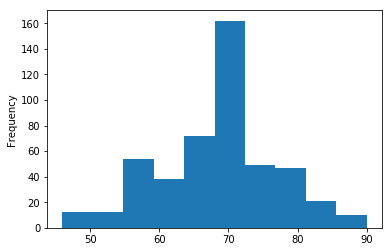

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
df_sub['age'].plot.hist()

In [17]:
print(cv.vocabulary_) #take a look at the count vectorizer vocabulary
print(X.shape)
print(df_sub.shape)
X.toarray() #turn X into an array list

{'theres': 1444, 'cookie': 263, 'jar': 724, 'on': 957, 'the': 1438, 'shelf': 1205, 'and': 52, 'little': 812, 'boys': 160, 'up': 1551, 'stool': 1372, 'is': 717, 'about': 0, 'to': 1486, 'fall': 458, 'hes': 640, 'stools': 1373, 'turn': 1527, 'over': 983, 'girl': 544, 'in': 696, 'pictures': 1039, 'reaching': 1121, 'for': 506, 'mother': 889, 'washing': 1588, 'dishes': 352, 'waters': 1592, 'running': 1157, 'onto': 961, 'floor': 494, 'she': 1203, 'has': 610, 'plate': 1051, 'her': 635, 'hand': 595, 'towel': 1504, 'shes': 1207, 'drying': 402, 'two': 1533, 'cups': 300, 'are': 73, 'sitting': 1258, 'counter': 276, 'also': 44, 'you': 1680, 'can': 195, 'see': 1183, 'out': 974, 'through': 1465, 'kitchen': 751, 'window': 1630, 'another': 57, 'part': 1012, 'of': 947, 'house': 665, 'walkway': 1576, 'away': 94, 'from': 520, 'across': 6, 'other': 968, 'roof': 1148, 'with': 1639, 'tree': 1508, 'that': 1435, 'there': 1443, 'curtains': 303, 'windows': 1631, 'think': 1455, 'thats': 1437, 'did': 339, 'cover': 

AttributeError: 'DataFrame' object has no attribute 'toarray'

In [18]:
y_list = df_sub['category'] #make a list of categories
y_list.shape

(477,)

run 0
max validation accuracy is 0.9375 and optimal c is 0.01
run 1
max validation accuracy is 0.8541666666666666 and optimal c is 0.099
run 2
max validation accuracy is 0.875 and optimal c is 0.099
run 3
max validation accuracy is 0.875 and optimal c is 1
run 4
max validation accuracy is 0.8333333333333334 and optimal c is 0.01
run 5
max validation accuracy is 0.8333333333333334 and optimal c is 0.099
run 6
max validation accuracy is 0.8958333333333334 and optimal c is 0.01
run 7
max validation accuracy is 0.8333333333333334 and optimal c is 0.01
run 8
max validation accuracy is 0.8541666666666666 and optimal c is 0.5
run 9
max validation accuracy is 0.7708333333333334 and optimal c is 10


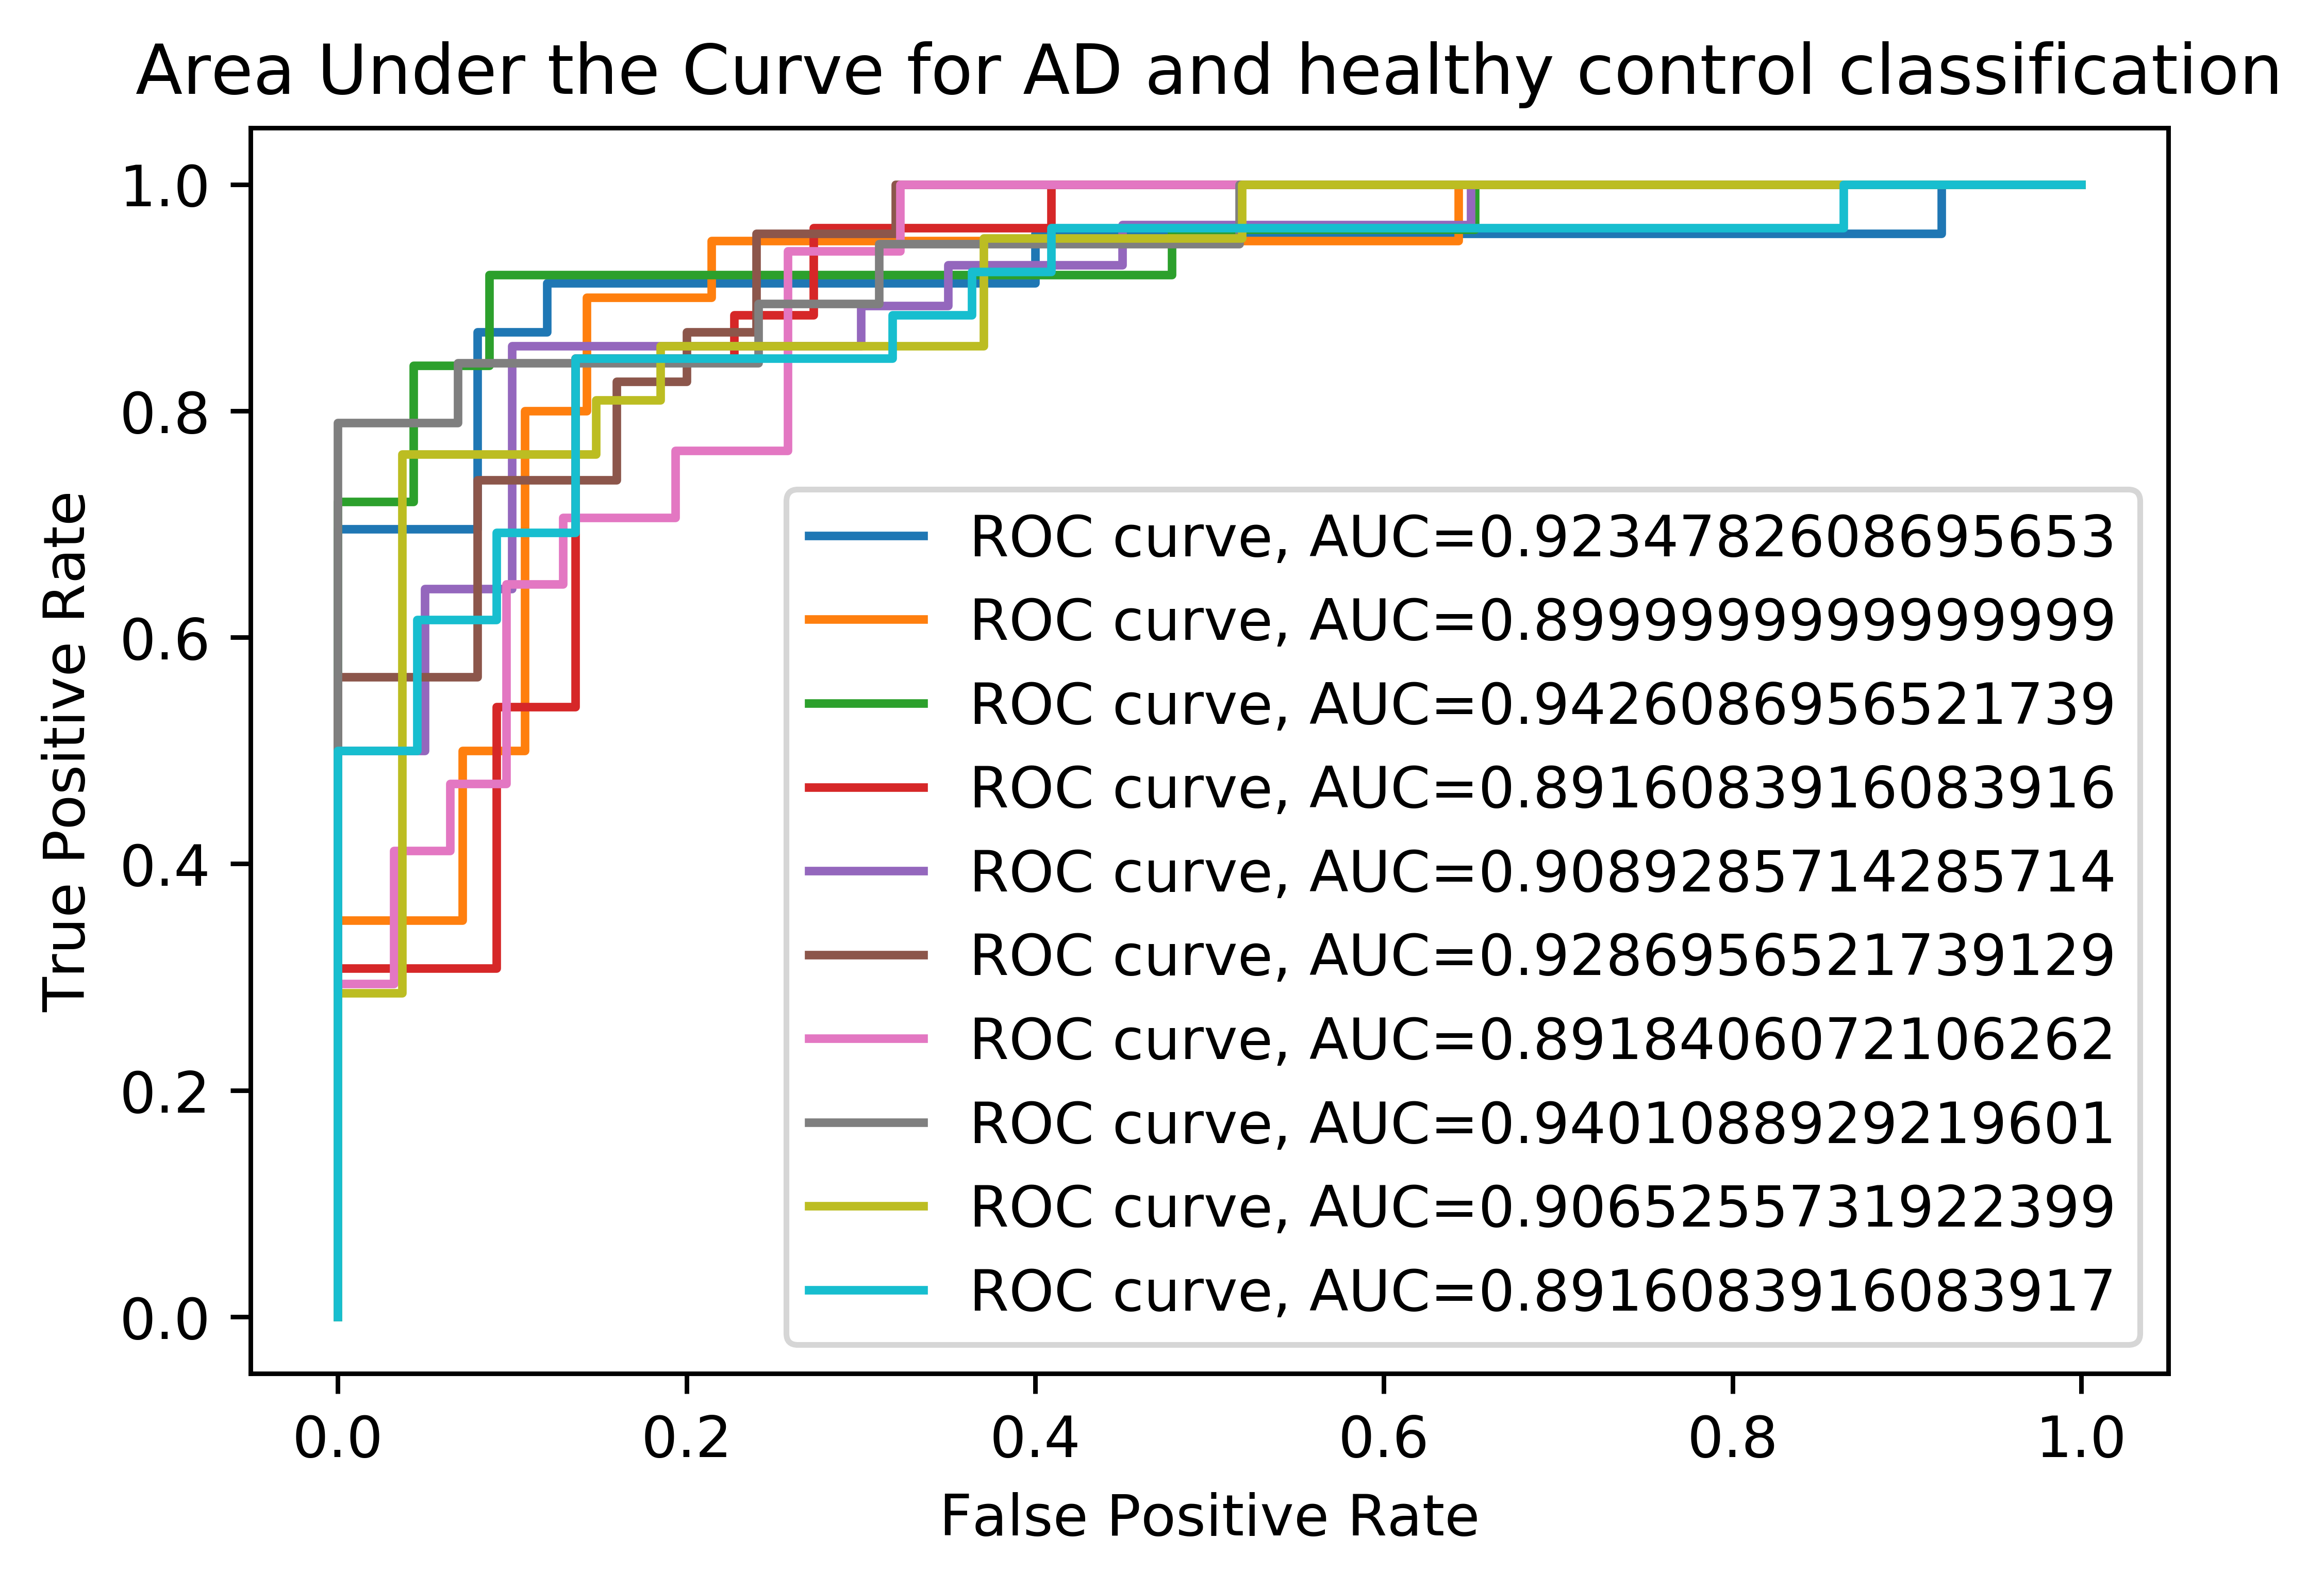

Test Accuracy: [0.8958333333333334, 0.8333333333333334, 0.8958333333333334, 0.8541666666666666, 0.8541666666666666, 0.8125, 0.7916666666666666, 0.875, 0.7916666666666666, 0.8333333333333334]
Test Accuracy Mean: 0.84375
Test Accuracy Std: 0.03638385249286039


In [19]:
#train test split and its function with the parameter # of times you want to see the validation accuracy
#also prints out maximum accuracy and its corresponding c each term, mean, and standard deviation
target = [1 if i == 'ProbableAD' else 0 for i in y_list] #这里要写啥
def run_classification_model(num_of_runs, X, target): #the function returns a list of test accuracy
    test_accuracy = [] #the list of accuracy should be empty before each time the function runs
    y_pred_proba_list = []
    auc_list = []
    plt.figure(dpi = 800)
    for i in range(num_of_runs): #for loop that runs exact number of times requested
        print("run " + str(i)) #print out which run it is
        validation_accuracy = [] #the list of validation accuracy, the max will be drawn from it at the end
        X_train, X_test, y_train, y_test = train_test_split( #get a test set of 10% of the data, and a train set of 90%
            X, target, test_size = 0.1
        )

        X_train, X_val, y_train, y_val = train_test_split( #get a train set of 80%, and a validation set of 10%
            X_train, y_train, train_size = 0.89
        )
        
        c_list = [0.099, 0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 1e10] #list of hyperparameters
        for c in c_list: #test each c

            lr = LogisticRegression(C=c) #imput the c
            lr.fit(X_train, y_train) #fitting
            
            
            current_validation_accuracy = accuracy_score(y_val, lr.predict(X_val)) #calculate validation accuracy
            validation_accuracy.append(current_validation_accuracy) #append the list
            
        max_accuracy = max(validation_accuracy) #draw the maximum of validation accuracy
        index = np.argmax(validation_accuracy) #take the index of the maximum
        c_optim = c_list[index] #take the corresponding c
        print ("max validation accuracy is {} and optimal c is {}".format(max_accuracy, c_optim)) #print out the results
 
        # apply the best c to train the model
        lr_optim = LogisticRegression(C=c_optim) #try the best c on test set
        lr_optim.fit(X_train, y_train) #fitting
        current_test_accuracy = accuracy_score(y_test, lr_optim.predict(X_test)) #calculate test accuracy
        test_accuracy.append(current_test_accuracy) #append test accuracy list
        
        #compute prediction probability
        y_pred_proba = lr_optim.predict_proba(X_test)[::,1]
        y_pred_proba_list.append(y_pred_proba)
        
        #plot AUC
        y_pred_proba = lr_optim.predict_proba(X_test)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        auc_list.append(auc)
        plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))   

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Area Under the Curve for AD and healthy control classification')
    plt.legend(loc=4)
    plt.savefig("age_gender_roc.png", dpi = 800)
    plt.show()
        
    return test_accuracy, y_pred_proba_list, auc_list #return the list

test_accuracy, y_pred_proba_list, auc_list = run_classification_model(10, X.drop("category", axis=1), target) #call the function
mean_accuracy = np.mean(test_accuracy) #take the mean of test accuracy
std_accuracy = np.std(test_accuracy) #take standard deviation
print("Test Accuracy:",test_accuracy)
print("Test Accuracy Mean:",mean_accuracy)
print("Test Accuracy Std:",std_accuracy)

In [28]:
#train test split and its function with the parameter # of times you want to see the validation accuracy
#also prints out maximum accuracy and its corresponding c each term, mean, and standard deviation
target = [1 if i == 'ProbableAD' else 0 for i in y_list] #这里要写啥
def run_classification_model(num_of_runs, X, target): #the function returns a list of test accuracy
    test_accuracy = [] #the list of accuracy should be empty before each time the function runs
    auc_list = []
    for i in range(num_of_runs): #for loop that runs exact number of times requested
        print("run " + str(i)) #print out which run it is
        validation_accuracy = [] #the list of validation accuracy, the max will be drawn from it at the end
        X_train, X_test, y_train, y_test = train_test_split( #get a test set of 10% of the data, and a train set of 90%
            X, target, test_size = 0.1
        )

        X_train, X_val, y_train, y_val = train_test_split( #get a train set of 80%, and a validation set of 10%
            X_train, y_train, train_size = 0.89
        )
        
        c_list = [0.099, 0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 1e10] #list of hyperparameters
        for c in c_list: #test each c

            lr = LogisticRegression(C=c) #imput the c
            lr.fit(X_train, y_train) #fitting
            
            
            current_validation_accuracy = accuracy_score(y_val, lr.predict(X_val)) #calculate validation accuracy
            validation_accuracy.append(current_validation_accuracy) #append the list
            
        max_accuracy = max(validation_accuracy) #draw the maximum of validation accuracy
        index = np.argmax(validation_accuracy) #take the index of the maximum
        c_optim = c_list[index] #take the corresponding c
        print ("max validation accuracy is {} and optimal c is {}".format(max_accuracy, c_optim)) #print out the results
 
        # apply the best c to train the model
        lr_optim = LogisticRegression(C=c_optim) #try the best c on test set
        lr_optim.fit(X_train, y_train) #fitting
        current_test_accuracy = accuracy_score(y_test, lr_optim.predict(X_test)) #calculate test accuracy
        test_accuracy.append(current_test_accuracy) #append test accuracy list
        
        y_pred_proba = lr_optim.predict_proba(X_test)[::,1]
        y_pred_proba_list.append(y_pred_proba)
        
        #plot AUC
        y_pred_proba = lr_optim.predict_proba(X_test)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        auc_list.append(auc)
        
    return test_accuracy, auc_list #return the list

test_accuracy, auc_list = run_classification_model(1000, X.drop("category", axis=1), target) #call the function
mean_accuracy = np.mean(test_accuracy) #take the mean of test accuracy
std_accuracy = np.std(test_accuracy) #take standard deviation
print("Test Accuracy:",test_accuracy)
print("Test Accuracy Mean:",mean_accuracy)
print("Test Accuracy Std:",std_accuracy)

run 0
max validation accuracy is 0.8541666666666666 and optimal c is 0.01
run 1
max validation accuracy is 0.875 and optimal c is 0.01
run 2
max validation accuracy is 0.875 and optimal c is 10
run 3
max validation accuracy is 0.8958333333333334 and optimal c is 0.099
run 4
max validation accuracy is 0.8541666666666666 and optimal c is 0.099
run 5
max validation accuracy is 0.9375 and optimal c is 0.01
run 6
max validation accuracy is 0.875 and optimal c is 100
run 7
max validation accuracy is 0.8541666666666666 and optimal c is 0.099
run 8
max validation accuracy is 0.8958333333333334 and optimal c is 0.099
run 9
max validation accuracy is 0.9375 and optimal c is 0.05
run 10
max validation accuracy is 0.875 and optimal c is 0.099
run 11
max validation accuracy is 0.8125 and optimal c is 0.01
run 12
max validation accuracy is 0.9375 and optimal c is 0.01
run 13
max validation accuracy is 0.875 and optimal c is 0.099
run 14
max validation accuracy is 0.9375 and optimal c is 10
run 15
ma

max validation accuracy is 0.8125 and optimal c is 0.099
run 119
max validation accuracy is 0.9375 and optimal c is 0.01
run 120
max validation accuracy is 0.875 and optimal c is 1
run 121
max validation accuracy is 0.875 and optimal c is 0.01
run 122
max validation accuracy is 0.8958333333333334 and optimal c is 1
run 123
max validation accuracy is 0.8958333333333334 and optimal c is 0.01
run 124
max validation accuracy is 0.8333333333333334 and optimal c is 0.01
run 125
max validation accuracy is 0.7708333333333334 and optimal c is 0.01
run 126
max validation accuracy is 0.9375 and optimal c is 0.01
run 127
max validation accuracy is 0.9166666666666666 and optimal c is 10
run 128
max validation accuracy is 0.9166666666666666 and optimal c is 0.05
run 129
max validation accuracy is 0.8333333333333334 and optimal c is 0.099
run 130
max validation accuracy is 0.875 and optimal c is 10000000000.0
run 131
max validation accuracy is 0.7708333333333334 and optimal c is 0.25
run 132
max vali

run 232
max validation accuracy is 0.9375 and optimal c is 0.01
run 233
max validation accuracy is 0.8333333333333334 and optimal c is 0.01
run 234
max validation accuracy is 0.9166666666666666 and optimal c is 0.099
run 235
max validation accuracy is 0.9166666666666666 and optimal c is 0.099
run 236
max validation accuracy is 0.875 and optimal c is 0.05
run 237
max validation accuracy is 0.8541666666666666 and optimal c is 0.01
run 238
max validation accuracy is 0.9375 and optimal c is 0.099
run 239
max validation accuracy is 0.9375 and optimal c is 0.25
run 240
max validation accuracy is 0.7916666666666666 and optimal c is 0.099
run 241
max validation accuracy is 0.8958333333333334 and optimal c is 0.01
run 242
max validation accuracy is 0.8125 and optimal c is 0.05
run 243
max validation accuracy is 0.9166666666666666 and optimal c is 0.099
run 244
max validation accuracy is 0.8541666666666666 and optimal c is 0.01
run 245
max validation accuracy is 0.9375 and optimal c is 0.05
run 

max validation accuracy is 0.8333333333333334 and optimal c is 0.099
run 347
max validation accuracy is 0.8541666666666666 and optimal c is 0.05
run 348
max validation accuracy is 0.8125 and optimal c is 0.01
run 349
max validation accuracy is 0.875 and optimal c is 0.25
run 350
max validation accuracy is 0.9166666666666666 and optimal c is 1
run 351
max validation accuracy is 0.8541666666666666 and optimal c is 0.01
run 352
max validation accuracy is 0.875 and optimal c is 0.099
run 353
max validation accuracy is 0.8541666666666666 and optimal c is 0.01
run 354
max validation accuracy is 0.875 and optimal c is 0.5
run 355
max validation accuracy is 0.8333333333333334 and optimal c is 0.01
run 356
max validation accuracy is 0.9166666666666666 and optimal c is 0.01
run 357
max validation accuracy is 0.8333333333333334 and optimal c is 0.01
run 358
max validation accuracy is 0.875 and optimal c is 0.099
run 359
max validation accuracy is 0.875 and optimal c is 0.099
run 360
max validatio

max validation accuracy is 0.8958333333333334 and optimal c is 0.01
run 463
max validation accuracy is 0.7916666666666666 and optimal c is 0.01
run 464
max validation accuracy is 0.8541666666666666 and optimal c is 0.01
run 465
max validation accuracy is 0.875 and optimal c is 0.099
run 466
max validation accuracy is 0.9375 and optimal c is 0.01
run 467
max validation accuracy is 0.8125 and optimal c is 0.01
run 468
max validation accuracy is 0.8958333333333334 and optimal c is 0.01
run 469
max validation accuracy is 0.9375 and optimal c is 0.25
run 470
max validation accuracy is 0.8541666666666666 and optimal c is 0.5
run 471
max validation accuracy is 0.8333333333333334 and optimal c is 0.01
run 472
max validation accuracy is 0.9166666666666666 and optimal c is 0.01
run 473
max validation accuracy is 0.8958333333333334 and optimal c is 0.01
run 474
max validation accuracy is 0.9375 and optimal c is 0.5
run 475
max validation accuracy is 0.8333333333333334 and optimal c is 0.01
run 47

max validation accuracy is 0.9166666666666666 and optimal c is 0.099
run 577
max validation accuracy is 0.8958333333333334 and optimal c is 0.099
run 578
max validation accuracy is 0.9166666666666666 and optimal c is 0.01
run 579
max validation accuracy is 0.8333333333333334 and optimal c is 0.01
run 580
max validation accuracy is 0.9791666666666666 and optimal c is 0.099
run 581
max validation accuracy is 0.9166666666666666 and optimal c is 0.05
run 582
max validation accuracy is 0.8333333333333334 and optimal c is 0.01
run 583
max validation accuracy is 0.8958333333333334 and optimal c is 0.05
run 584
max validation accuracy is 0.8125 and optimal c is 0.01
run 585
max validation accuracy is 0.8958333333333334 and optimal c is 0.01
run 586
max validation accuracy is 0.9166666666666666 and optimal c is 100
run 587
max validation accuracy is 0.8541666666666666 and optimal c is 0.01
run 588
max validation accuracy is 0.9166666666666666 and optimal c is 0.25
run 589
max validation accurac

max validation accuracy is 0.875 and optimal c is 0.25
run 693
max validation accuracy is 0.8958333333333334 and optimal c is 0.099
run 694
max validation accuracy is 0.8958333333333334 and optimal c is 0.25
run 695
max validation accuracy is 0.875 and optimal c is 0.099
run 696
max validation accuracy is 0.9375 and optimal c is 1
run 697
max validation accuracy is 0.9166666666666666 and optimal c is 0.01
run 698
max validation accuracy is 0.8541666666666666 and optimal c is 0.01
run 699
max validation accuracy is 0.875 and optimal c is 1
run 700
max validation accuracy is 0.8333333333333334 and optimal c is 1
run 701
max validation accuracy is 0.8541666666666666 and optimal c is 0.5
run 702
max validation accuracy is 0.875 and optimal c is 0.099
run 703
max validation accuracy is 0.9166666666666666 and optimal c is 0.099
run 704
max validation accuracy is 0.8333333333333334 and optimal c is 100
run 705
max validation accuracy is 0.8541666666666666 and optimal c is 0.099
run 706
max va

max validation accuracy is 0.9375 and optimal c is 0.01
run 807
max validation accuracy is 0.7916666666666666 and optimal c is 0.099
run 808
max validation accuracy is 0.875 and optimal c is 0.01
run 809
max validation accuracy is 0.9166666666666666 and optimal c is 0.099
run 810
max validation accuracy is 0.8125 and optimal c is 0.01
run 811
max validation accuracy is 0.8333333333333334 and optimal c is 0.099
run 812
max validation accuracy is 0.875 and optimal c is 10
run 813
max validation accuracy is 0.9166666666666666 and optimal c is 0.099
run 814
max validation accuracy is 0.8541666666666666 and optimal c is 0.099
run 815
max validation accuracy is 0.9166666666666666 and optimal c is 0.25
run 816
max validation accuracy is 0.875 and optimal c is 1
run 817
max validation accuracy is 0.9583333333333334 and optimal c is 0.01
run 818
max validation accuracy is 0.8541666666666666 and optimal c is 10
run 819
max validation accuracy is 0.9375 and optimal c is 0.099
run 820
max validati

max validation accuracy is 0.9375 and optimal c is 0.099
run 922
max validation accuracy is 0.875 and optimal c is 0.099
run 923
max validation accuracy is 0.7291666666666666 and optimal c is 0.099
run 924
max validation accuracy is 0.8541666666666666 and optimal c is 0.01
run 925
max validation accuracy is 0.875 and optimal c is 0.099
run 926
max validation accuracy is 0.8333333333333334 and optimal c is 0.05
run 927
max validation accuracy is 0.875 and optimal c is 0.01
run 928
max validation accuracy is 0.8541666666666666 and optimal c is 0.099
run 929
max validation accuracy is 0.8333333333333334 and optimal c is 0.25
run 930
max validation accuracy is 0.875 and optimal c is 0.01
run 931
max validation accuracy is 0.875 and optimal c is 0.01
run 932
max validation accuracy is 0.875 and optimal c is 0.099
run 933
max validation accuracy is 0.875 and optimal c is 0.099
run 934
max validation accuracy is 0.9375 and optimal c is 0.01
run 935
max validation accuracy is 0.854166666666666

In [29]:
print(np.mean(auc_list))
print(np.std(auc_list))

0.9135810973901121
0.04073644730320258


In [21]:
print(y_pred_proba_list)

[array([0.69831215, 0.42580571, 0.47017047, 0.772869  , 0.71221869,
       0.47387756, 0.30625556, 0.68657367, 0.46526592, 0.94231424,
       0.68708274, 0.54466977, 0.42223347, 0.29657521, 0.53520183,
       0.27356396, 0.69354832, 0.37726167, 0.33602338, 0.56723936,
       0.73375911, 0.26712613, 0.79074935, 0.26058261, 0.62461776,
       0.31825634, 0.28521246, 0.56670622, 0.70192439, 0.67569696,
       0.26753955, 0.31138002, 0.63282429, 0.39431758, 0.34474785,
       0.48099823, 0.62391488, 0.357009  , 0.50979673, 0.82593986,
       0.24600668, 0.53300933, 0.88162493, 0.44331594, 0.84171495,
       0.36807734, 0.68159809, 0.3754838 ]), array([0.59173439, 0.37801723, 0.1607768 , 0.78157205, 0.98856788,
       0.74724407, 0.29522398, 0.97968594, 0.14107739, 0.28167193,
       0.26807657, 0.09896587, 0.13942174, 0.63589539, 0.29200321,
       0.73362443, 0.87144893, 0.04848682, 0.07691404, 0.02345792,
       0.34071326, 0.15230296, 0.85727177, 0.49338462, 0.06458741,
       0.1920039

In [ ]:
y_pred_proba_avg = np.average(np.array(y_pred_proba_list), axis=0)

In [25]:
X_train

NameError: name 'X_train' is not defined

In [20]:
final_model = LogisticRegression(C=0.01) #training set with c
final_model.fit(X_train.drop("category", axis=1), y_train) #fitting
print ("Final Accuracy: %s" 
       % accuracy_score(y_test, final_model.predict(X_test.drop("category", axis=1)))) #print training set accuracy

NameError: name 'X_train' is not defined

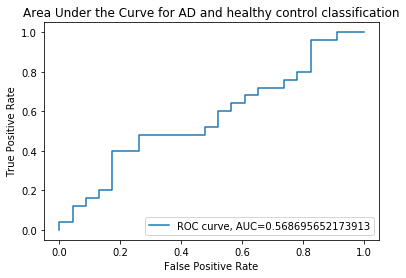

In [61]:
#plot AUC
%matplotlib inline
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under the Curve for AD and healthy control classification')
plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#rank the importance of features
print(lr.coef_)
print(lr.coef_.shape)
importance_rank = np.argsort(-abs(lr.coef_))
print(importance_rank[:10])

In [36]:
#do we still need this?
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), final_model.coef_[0]
    )
}
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)
    
    
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)

('the', 0.7663153091199435)
('get', 0.56372568913356)
('it', 0.5515240520550294)
('its', 0.5196149005289883)
('has', 0.4624303060231362)
('action', -1.020755519210773)
('outof', -0.837417248534173)
('open', -0.822324865156824)
('reaching', -0.7066005737361224)
('overflowing', -0.6946282722920067)
